In [ ]:
import pandas as pd
import numpy as np
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Processing

In [ ]:
train_data = pd.read_csv(r'/content/drive/MyDrive/original/liar/train.tsv',  sep='\t')
test_data = pd.read_csv(r'/content/drive/MyDrive/original/liar/test.tsv',  sep='\t')

In [ ]:
col_names = ['id','label','statement','subject','speaker','job_title','state_info','party_affiliation','barely_true_counts','false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','context']
train_data.columns = col_names
test_data.columns = col_names

In [ ]:
train_data.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [ ]:
test_data.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10239 non-null  object 
 1   label                 10239 non-null  object 
 2   statement             10239 non-null  object 
 3   subject               10237 non-null  object 
 4   speaker               10237 non-null  object 
 5   job_title             7342 non-null   object 
 6   state_info            8031 non-null   object 
 7   party_affiliation     10237 non-null  object 
 8   barely_true_counts    10237 non-null  float64
 9   false_counts          10237 non-null  float64
 10  half_true_counts      10237 non-null  float64
 11  mostly_true_counts    10237 non-null  float64
 12  pants_on_fire_counts  10237 non-null  float64
 13  context               10137 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1266 non-null   object
 1   label                 1266 non-null   object
 2   statement             1266 non-null   object
 3   subject               1266 non-null   object
 4   speaker               1266 non-null   object
 5   job_title             941 non-null    object
 6   state_info            1004 non-null   object
 7   party_affiliation     1266 non-null   object
 8   barely_true_counts    1266 non-null   int64 
 9   false_counts          1266 non-null   int64 
 10  half_true_counts      1266 non-null   int64 
 11  mostly_true_counts    1266 non-null   int64 
 12  pants_on_fire_counts  1266 non-null   int64 
 13  context               1249 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.6+ KB


In [ ]:
train_data['label'] = train_data['label'].replace('false', 0)
train_data['label'] = train_data['label'].replace('half-true', 1)
train_data['label'] = train_data['label'].replace('mostly-true', 2)
train_data['label'] = train_data['label'].replace('true', 3)
train_data['label'] = train_data['label'].replace('barely-true', 4)
train_data['label'] = train_data['label'].replace('pants-fire', 5)

In [ ]:
test_data['label'] = test_data['label'].replace('false', 0)
test_data['label'] = test_data['label'].replace('half-true', 1)
test_data['label'] = test_data['label'].replace('mostly-true', 2)
test_data['label'] = test_data['label'].replace('true', 3)
test_data['label'] = test_data['label'].replace('barely-true', 4)
test_data['label'] = test_data['label'].replace('pants-fire', 5)

In [ ]:
df = pd.concat([train_data,test_data])

In [ ]:
df = df.drop(['id','speaker', 'job_title', 'state_info', 'party_affiliation','barely_true_counts', 'false_counts','half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts','context'], axis=1)
del df['subject']

In [ ]:
df.head()

,label,statement
0,1,When did the decline of coal start? It started...
1,2,"Hillary Clinton agrees with John McCain ""by vo..."
2,0,Health care reform legislation is likely to ma...
3,1,The economic turnaround started at the end of ...
4,3,The Chicago Bears have had more starting quart...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      11505 non-null  int64 
 1   statement  11505 non-null  object
dtypes: int64(1), object(1)
memory usage: 269.6+ KB


# Data Cleaning

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      11505 non-null  int64 
 1   statement  11505 non-null  object
dtypes: int64(1), object(1)
memory usage: 269.6+ KB


In [ ]:
df['label'] = df['label'].replace(0,1)
df['label'] = df['label'].replace(1,0)
df['label'] = df['label'].replace(2,0)
df['label'] = df['label'].replace(3,0)
df['label'] = df['label'].replace(4,1)
df['label'] = df['label'].replace(5,1)

In [ ]:
!pip install nltk
!pip install regex
!pip install contractions
import re
import contractions
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('words') #download list of english words
nltk.download('stopwords') #download list of stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
stopWords = stopwords.words('english')
englishWords = set(nltk.corpus.words.words())


def remove_contractions(text): 
    return ' '.join([contractions.fix(word) for word in text.split()])

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

def nltkToWordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def lemmatize(tokens):
    pos_tags = nltk.pos_tag(tokens)    
    res_words = []
    for word, tag in pos_tags:
        tag = nltkToWordnet(tag)    
        if tag is None:                        
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return res_words

def remove_stopWords(tokens):
    return [w for w in tokens if (w in englishWords and w not in stopWords)]

def split_and_filter_words(string):
  words = string.split()
  if len(words) > 10:
    return " ".join(words)
  return None
  
    
def clean_text(text):
    text = ' '.join([contractions.fix(word) for word in text.split()])
    # Tokenize text
    tokens = tokenizer.tokenize(text)
    # Lemmatize tokens
    tokens = lemmatize(tokens)
    # Remove stopwords
    tokens = remove_stopWords(tokens)
    # Print results
    text = " ".join(tokens)
    return text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 18.2 MB/s eta 0:00:00


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['statement'] = df['statement'].apply(lambda x: np.str_(x))
#lowercase
df['statement'] = df['statement'].apply(lambda x: x.lower())
#url removal
df['statement'] = df['statement'].apply(lambda x: re.sub(r"http\S+", "", x))
# remove special characters, numbers, and punctuation
df['statement'] = df['statement'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
#apply clean_text
df['statement'] = df['statement'].apply(lambda x: clean_text(x))

In [ ]:
print(df['statement'])

0       decline coal start start natural gas take star...
1                      agree vote give bush benefit doubt
2       health care reform legislation likely mandate ...
3                      economic turnaround start end term
4       bear starting quarterback last year total numb...
                              ...                        
1261    say budget provide high state level history ed...
1262                                     almost every day
1263    early sen secretly offer help soviet leader co...
1264         say permit languish new director get two day
1265    say governor go around state talk fund income ...
Name: statement, Length: 11505, dtype: object


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11505 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      11505 non-null  int64 
 1   statement  11505 non-null  object
dtypes: int64(1), object(1)
memory usage: 269.6+ KB


In [ ]:
df.head()

,label,statement
0,0,decline coal start start natural gas take star...
1,0,agree vote give bush benefit doubt
2,0,health care reform legislation likely mandate ...
3,0,economic turnaround start end term
4,0,bear starting quarterback last year total numb...


In [ ]:
df.to_csv(r'/content/drive/MyDrive/New/Clean/LIAR_clean.csv')
# saving the dataframe

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/New/Clean/LIAR_clean.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11505 entries, 0 to 11504
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11505 non-null  int64 
 1   label       11505 non-null  int64 
 2   statement   11501 non-null  object
dtypes: int64(2), object(1)
memory usage: 269.8+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 0 to 11504
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11501 non-null  int64 
 1   label       11501 non-null  int64 
 2   statement   11501 non-null  object
dtypes: int64(2), object(1)
memory usage: 359.4+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(df['statement'].values.astype('U'))
y = df['label']

import joblib
# Save the TfidfVectorizer
joblib.dump(tfidf_v, '/content/drive/MyDrive/Colab Notebooks/weights/LIAR/learners/tfidf_liar.pkl')

['/content/drive/MyDrive/Colab Notebooks/weights/LIAR/learners/tfidf_liar.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Model accuracy score with default hyperparameters: 0.7553
Precision: 0.361 / Recall: 0.024 / F1-Score: 0.044 / Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1748
           1       0.36      0.02      0.04       553

    accuracy                           0.76      2301
   macro avg       0.56      0.51      0.45      2301
weighted avg       0.67      0.76      0.66      2301



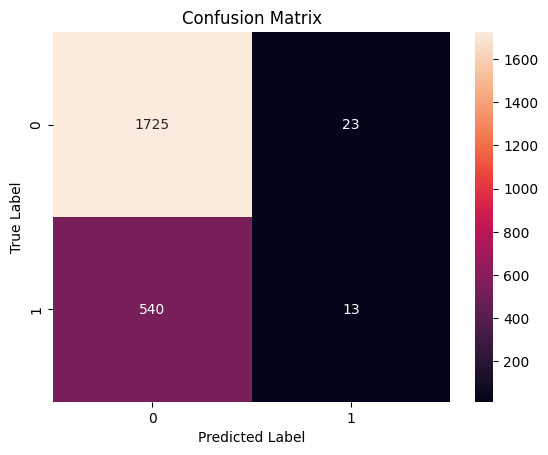

['/content/drive/MyDrive/Colab Notebooks/weights/LIAR/logr_liar.pkl']

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(acs(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
joblib.dump(logr, '/content/drive/MyDrive/Colab Notebooks/weights/LIAR/logr_liar.pkl')

Model accuracy score with default hyperparameters: 0.7584
Precision: 0.412 / Recall: 0.013 / F1-Score: 0.025 / Accuracy: 0.758
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1748
           1       0.41      0.01      0.02       553

    accuracy                           0.76      2301
   macro avg       0.59      0.50      0.44      2301
weighted avg       0.68      0.76      0.66      2301



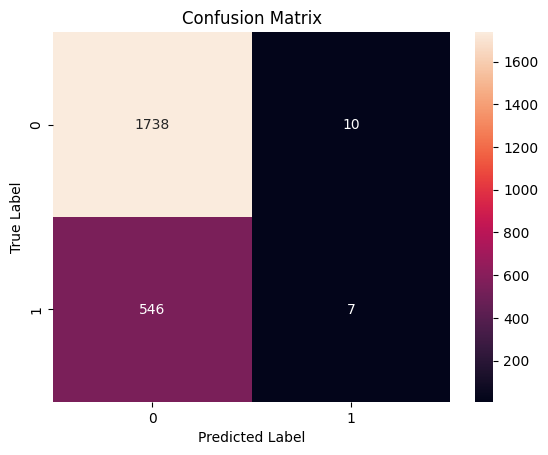

['/content/drive/MyDrive/Colab Notebooks/weights/LIAR/svm_liar.pkl']

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Iteration 1, loss = 0.59224308
Iteration 2, loss = 0.51309649
Iteration 3, loss = 0.45528766
Iteration 4, loss = 0.38581140
Iteration 5, loss = 0.31777991
Iteration 6, loss = 0.25617257
Iteration 7, loss = 0.19890288
Iteration 8, loss = 0.15739075
Iteration 9, loss = 0.12206057
Iteration 10, loss = 0.09147127
Iteration 11, loss = 0.07032312
Iteration 12, loss = 0.05937093
Iteration 13, loss = 0.04986621
Iteration 14, loss = 0.04309968
Iteration 15, loss = 0.03856237
Iteration 16, loss = 0.03553314
Iteration 17, loss = 0.03412474
Iteration 18, loss = 0.03305548
Iteration 19, loss = 0.03207927
Iteration 20, loss = 0.03102770
Iteration 21, loss = 0.03262424
Iteration 22, loss = 0.03054732
Iteration 23, loss = 0.02989485
Iteration 24, loss = 0.02942474
Iteration 25, loss = 0.02951219
Iteration 26, loss = 0.02900343
Iteration 27, loss = 0.02847394
Iteration 28, loss = 0.02815166
Iteration 29, loss = 0.02819634
Iteration 30, loss = 0.02855306
Iteration 31, loss = 0.02980681
Iteration 32, los

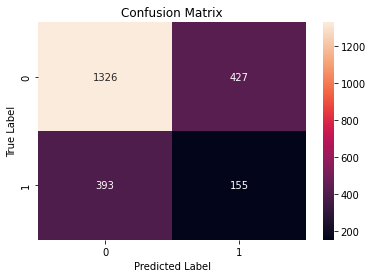

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Precision: 0.083 / Recall: 0.002 / F1-Score: 0.004 / Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1748
           1       0.08      0.00      0.00       553

    accuracy                           0.76      2301
   macro avg       0.42      0.50      0.43      2301
weighted avg       0.60      0.76      0.65      2301



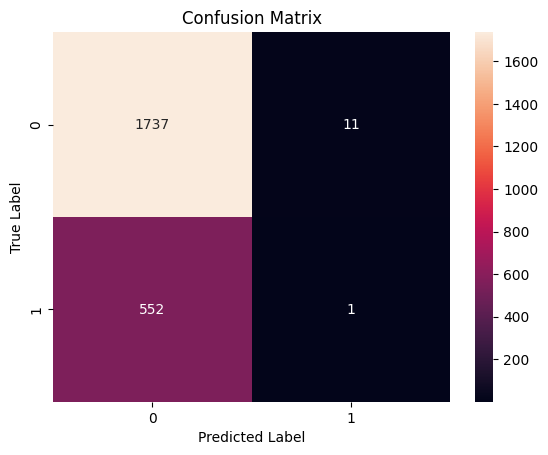

['/content/drive/MyDrive/Colab Notebooks/weights/LIAR/knn_liar.pkl']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred = knn.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))
    
# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
joblib.dump(knn, '/content/drive/MyDrive/Colab Notebooks/weights/LIAR/knn_liar.pkl')

Precision: 0.294 / Recall: 0.045 / F1-Score: 0.078 / Accuracy: 0.744
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1748
           1       0.29      0.05      0.08       553

    accuracy                           0.74      2301
   macro avg       0.53      0.51      0.47      2301
weighted avg       0.65      0.74      0.67      2301



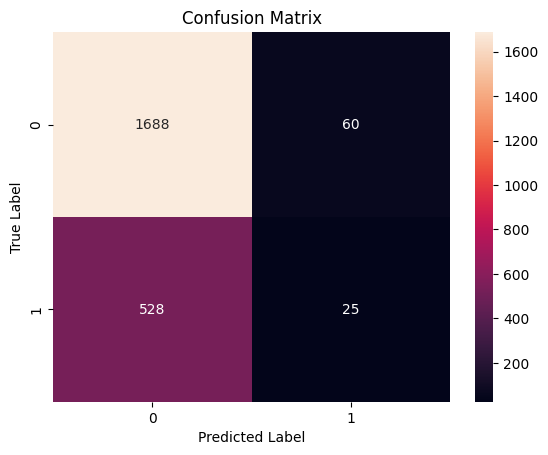

['/content/drive/MyDrive/Colab Notebooks/weights/LIAR/rf_liar.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

joblib.dump(rf_model, '/content/drive/MyDrive/Colab Notebooks/weights/LIAR/rf_liar.pkl')

Precision: 0.362 / Recall: 0.076 / F1-Score: 0.126 / Accuracy: 0.746


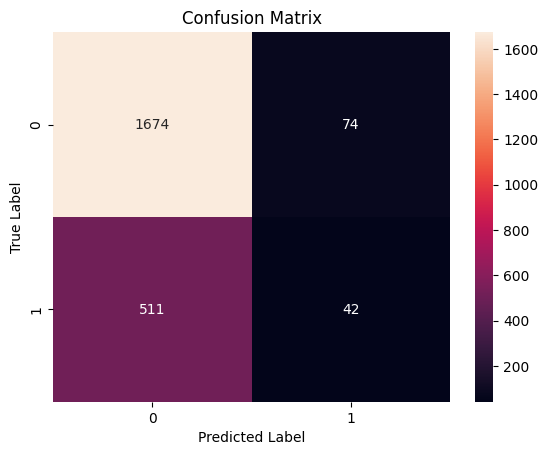

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)


# Combine the classifiers using a voting ensemble
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('lr', lr_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
voting_preds = voting_clf.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

predictions = [round(value) for value in y_pred]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7535853976531942
Precision: 0.36619718309859156
Recall: 0.04744525547445255
F1-Score: 0.08400646203554119


In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE : % f" %(mse))

MSE :  0.181820


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.426404


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.751412429378531
Precision: 0.38461538461538464
Recall: 0.072992700729927
F1-Score: 0.12269938650306748


Accuracy: 0.6653628857018687
Precision: 0.282 / Recall: 0.263 / F1-Score: 0.272 / Accuracy: 0.665
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1753
           1       0.28      0.26      0.27       548

    accuracy                           0.67      2301
   macro avg       0.53      0.53      0.53      2301
weighted avg       0.66      0.67      0.66      2301



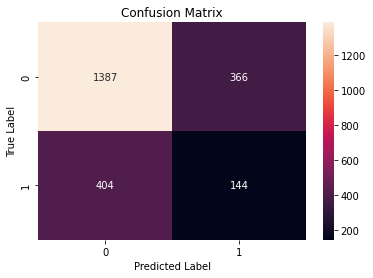

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()